# <center> Chapter 3. Classification </center> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset 

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### Structure of sklearn datasets

Datasets have a dict structure with the following important keys
<ul>
    <li>DESCR - describing the dataset</li>
    <li>data - containing an array with one row per instance and one column per feature (n*p)</li>
    <li>target - containing an array with labels</li>

In [5]:
X, y = mnist['data'],mnist['target']

In [9]:
X.shape, y.shape

((70000, 784), (70000,))

In [35]:
some_digit = np.array(X.iloc[0])
some_digit_image = some_digit.reshape(28,28)

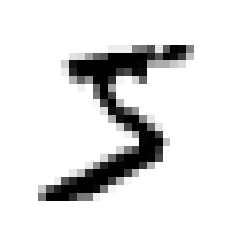

In [22]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [23]:
y[0]

'5'

In [25]:
y = y.astype(np.uint8)

## Train test split 

In [26]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary classifier

In [36]:
y_train_5, y_test_5 = (y_train==5), (y_test==5)

In [37]:
from sklearn.linear_model import SGDClassifier

In [38]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

NameError: name 'sgd_predict' is not defined

In [39]:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures 

### Cross validation 

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [41]:
# To-do - implement stratified k fold cross validation score

In [42]:
from sklearn.model_selection import cross_val_score

In [44]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [45]:
from sklearn.base import BaseEstimator

In [55]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        np.zeros((len(X)), dtype=bool)

In [56]:
never_5_clf = Never5Classifier()

In [73]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

### Confusion Matrix 

In [58]:
from sklearn.model_selection import cross_val_predict

In [76]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [62]:
from sklearn.metrics import confusion_matrix

In [77]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

### Precision, Recall, F1 

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [79]:
print(precision_score(y_train_5, y_train_pred)) # Of the instances classified as 5, how many were actually 5
print(recall_score(y_train_5, y_train_pred)) # Of all the 5s, how many were classified as 5
print(f1_score(y_train_5, y_train_pred)) # harmonic mean of the two above

0.8370879772350012
0.6511713705958311
0.7325171197343846


In [80]:
from sklearn.metrics import precision_recall_curve

In [81]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [82]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [97]:
def plot_precision_recall_curve(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], color='blue', ls='solid', label='Precision')
    plt.plot(thresholds, recalls[:-1], color='green', ls='dashed', label='Recall')
    plt.axvline(x = 8000, color = 'r', label = '8000')
    plt.legend()
    plt.xlabel('Threshold')
    plt.ylabel('Scores')
    plt.grid()

In [101]:
thresholds[thresholds > 7999]

array([ 8001.93008617,  8004.18873042,  8010.90928224, ...,
       38871.26391927, 42216.05562787, 49441.43765905])

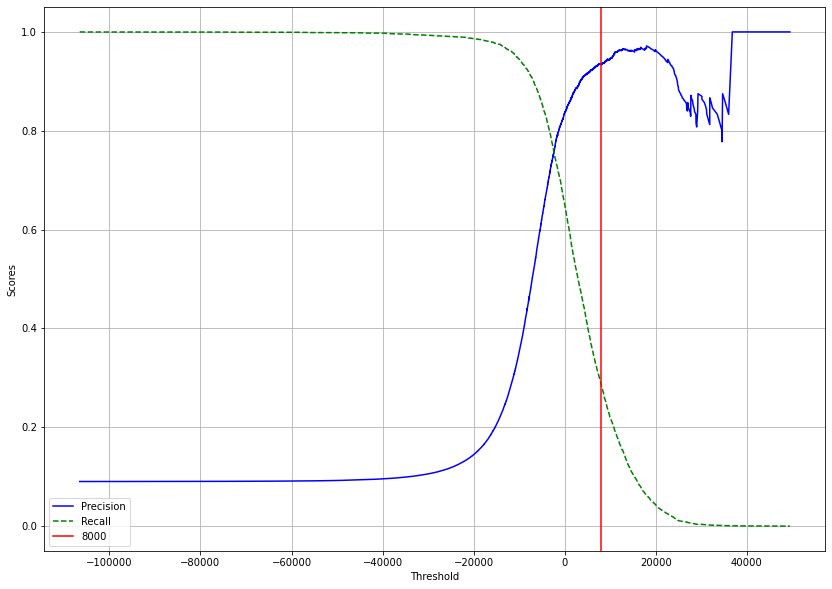

In [98]:
plt.figure(figsize=(14,10))
plot_precision_recall_curve(precisions, recalls, thresholds)
plt.show()

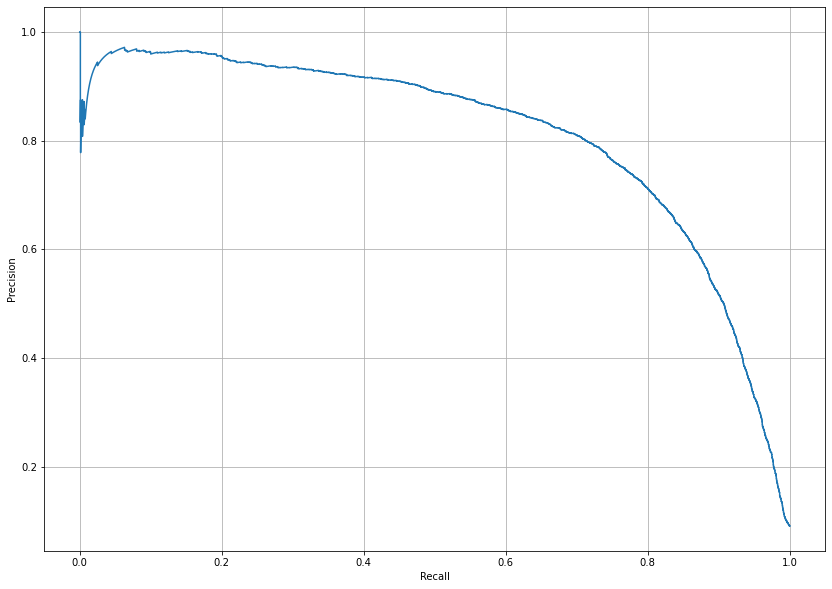

In [103]:
plt.figure(figsize=(14,10))
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

## The ROC Curve (Receiver Operating Characteristic) 

In [110]:
from sklearn.metrics import roc_curve

In [111]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [124]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'b--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid()

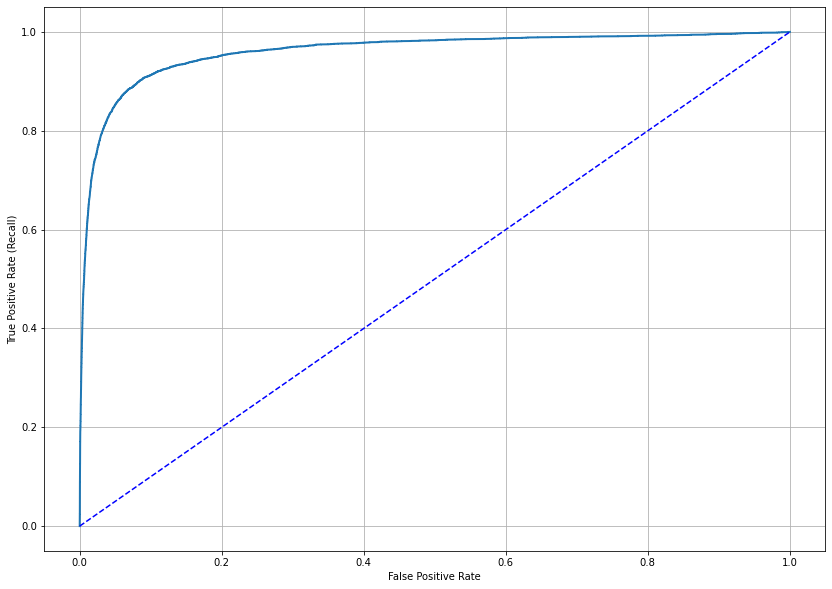

In [126]:
plt.figure(figsize=(14,10))
plot_roc_curve(fpr, tpr, 'ROC Curve')
plt.show()

## AUC-ROC

Area under the curve - ROC

In [127]:
from sklearn.metrics import roc_auc_score

In [128]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rf_clf = RandomForestClassifier(random_state=42)

In [132]:
y_probabs = cross_val_predict(rf_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [135]:
y_scores_forest = y_probabs[:,1]

In [136]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

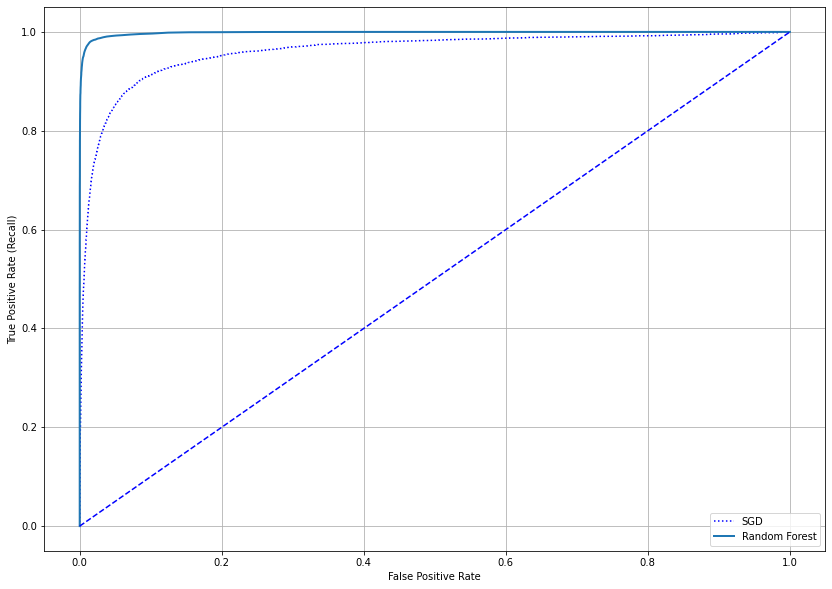

In [138]:
plt.figure(figsize=(14,10))
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [139]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

## Multiclass Classification 

In [140]:
from sklearn.svm import SVC

In [143]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [144]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [149]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [150]:
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [156]:
some_digit_scores.argmax()

5

#### SVM by default uses a One vs One classifier

Running a One vs Rest classifier

In [145]:
from sklearn.multiclass import OneVsRestClassifier

In [146]:
ovr_clf = OneVsRestClassifier(SVC())

In [148]:
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [151]:
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

#### Random Forest and SGD directly classify instances into multiple classes hence there's no need for OvO or OvR  

#### Note: Scaling results in better performance

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
scaler = StandardScaler()

In [154]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [155]:
cross_val_score(rf_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.96445, 0.96255, 0.96645])

## Error Analysis 

In [159]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [160]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [161]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

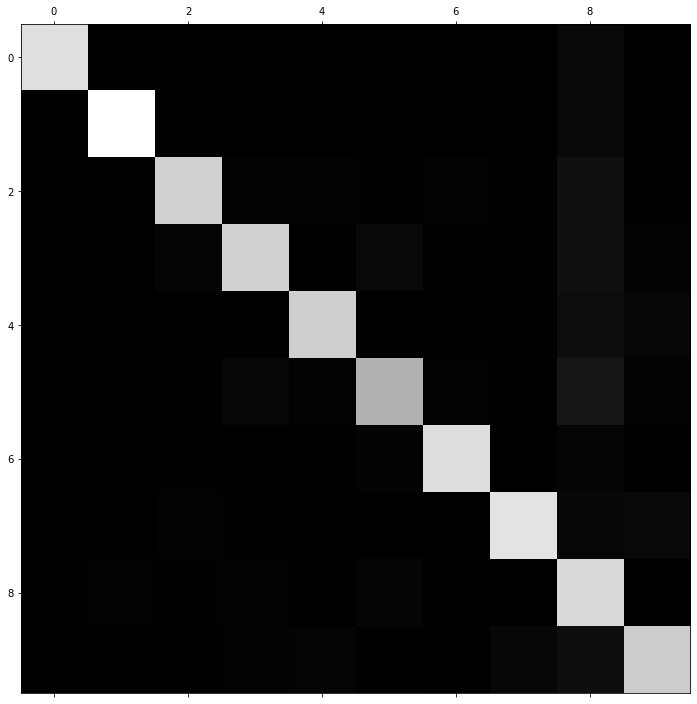

In [170]:
plt.figure(figsize=(14,12))
plt.matshow(conf_mx, cmap=plt.cm.gray, fignum=1)
plt.show()

In [163]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [164]:
norm_conf_mx = conf_mx / row_sums

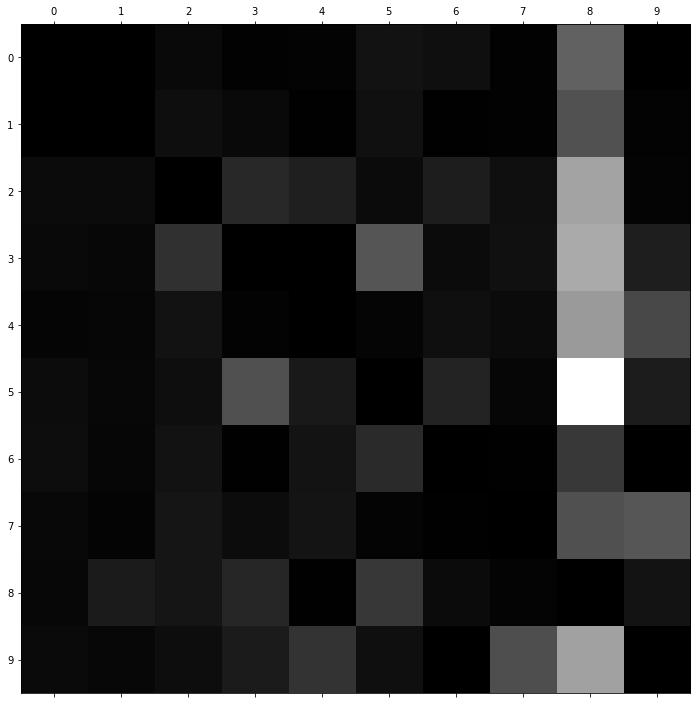

In [174]:
np.fill_diagonal(norm_conf_mx, 0)

plt.figure(figsize=(14,12))
plt.matshow(norm_conf_mx, cmap=plt.cm.gray, fignum=1)
plt.xticks(ticks=y_train.unique())
plt.yticks(ticks=y_train.unique())
plt.show()